In [2]:
import torchtext
from torchtext.legacy import data
from torchtext.legacy import datasets
print(torchtext.__version__)


0.9.0


In [3]:
# create Field objects
SESSION_ID = data.Field()
TIMESTAMP = data.Field()
USER_ID = data.Field()
PRODUCT_ID = data.Field()
EVENT_TYPE = data.Field()
OFFERED_DISCOUNT = data.Field()
PURCHASE_ID = data.Field()

# create a dictionary representing the dataset
fields = {
  'session_id': ('session_id', SESSION_ID),
  'timestamp': ('timestamp', TIMESTAMP),
  'user_id': ('user_id', USER_ID),
  'product_id': ('product_id', PRODUCT_ID),
  'event_type': ('event_type', EVENT_TYPE),
  'offered_discount': ('offered_discount', OFFERED_DISCOUNT),
  'purchase_id': ('purchase_id', PURCHASE_ID)
}

# load the dataset in json format
train_ds, valid_ds, test_ds = data.TabularDataset.splits(
  path = 'data',
  train = 'sessions.jsonl',
  validation = 'sessions.jsonl',
  test = 'sessions.jsonl',
  format = 'json',
  fields = fields
)




In [4]:
# check an example
print(vars(train_ds[0]))
print(vars(train_ds[2]))

{'session_id': 100001, 'timestamp': ['2021-01-27T08:29:10'], 'user_id': 102, 'product_id': 1233, 'event_type': ['VIEW_PRODUCT'], 'offered_discount': 0, 'purchase_id': None}
{'session_id': 100001, 'timestamp': ['2021-01-27T08:36:37'], 'user_id': 102, 'product_id': None, 'event_type': ['BUY_PRODUCT'], 'offered_discount': 0, 'purchase_id': 20001}


In [5]:
import matplotlib.pyplot as plt
import pandas as pd 
data = pd.read_json(os.path.abspath('') + "/data/sessions.jsonl", lines=True)
data = data[['session_id','timestamp','user_id','product_id','event_type','offered_discount','purchase_id']]

cleanup = {"event_type":{"BUY_PRODUCT":1, "VIEW_PRODUCT":0}}
data = data.replace(cleanup)
data.fillna(0)

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
0,100001,2021-01-27 08:29:10,102.0,1233.0,0,0,0.0
1,100001,2021-01-27 08:32:04,102.0,1234.0,0,0,0.0
2,100001,2021-01-27 08:36:37,102.0,0.0,1,0,20001.0
3,100002,2021-02-01 08:17:36,102.0,1072.0,0,0,0.0
4,100002,2021-02-01 08:22:30,102.0,1073.0,0,0,0.0
...,...,...,...,...,...,...,...
56719,110270,2021-03-12 08:18:09,301.0,0.0,0,10,0.0
56720,110270,2021-03-12 08:21:03,301.0,1039.0,0,10,0.0
56721,110271,2021-02-02 05:38:37,301.0,1035.0,0,0,0.0
56722,110271,2021-02-02 05:38:42,301.0,1067.0,0,0,0.0


<AxesSubplot:>

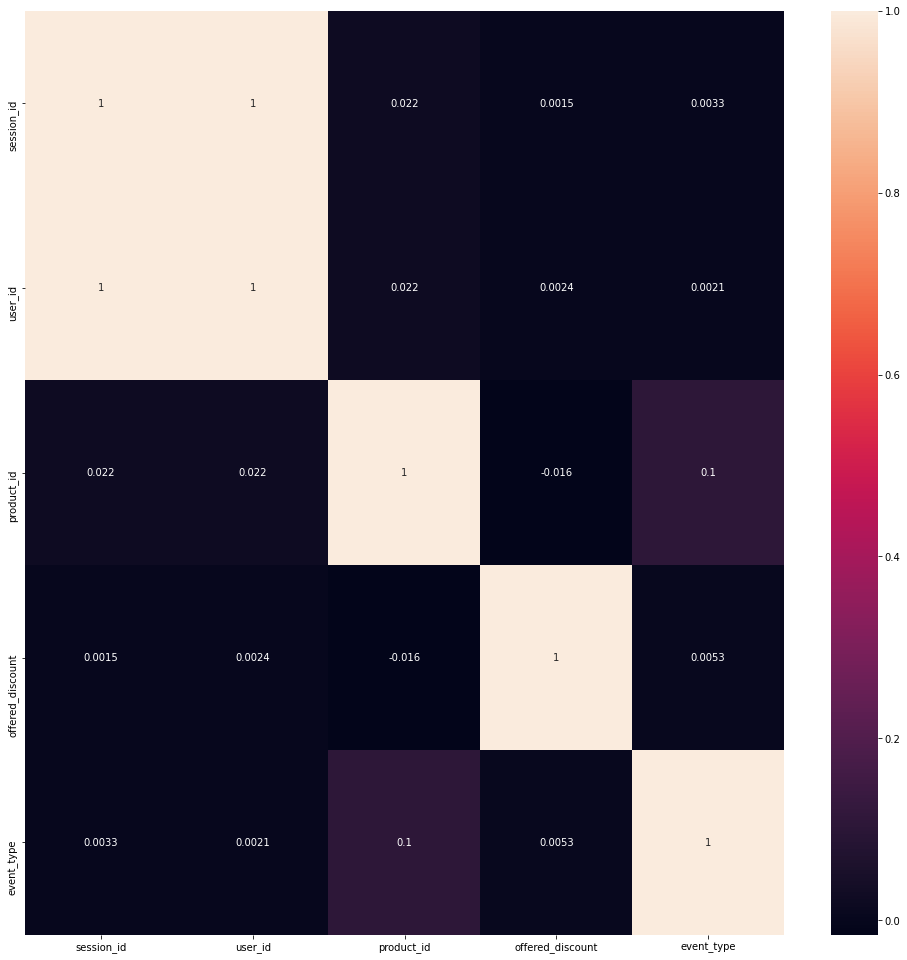

In [7]:

plt.figure(figsize=(17,17))
valuable_data = ['session_id','user_id', 'product_id', 'offered_discount', 'event_type' ]
sns.heatmap(data[valuable_data].corr(),annot = True)

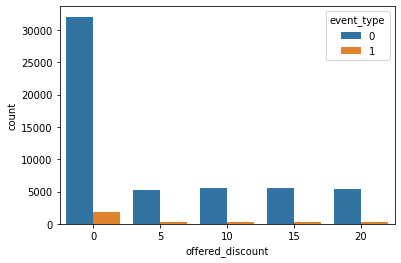

In [6]:
import seaborn as sns
g = sns.countplot(x="offered_discount",hue="event_type",data=data)

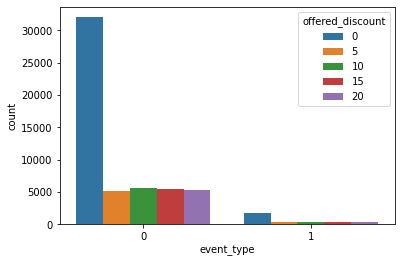

In [48]:
g2 = sns.countplot(x="event_type",hue="offered_discount",data=data)

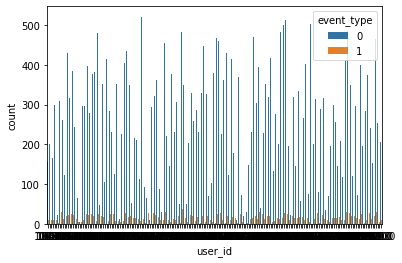

In [54]:
g3 = sns.countplot(x='user_id',hue='event_type',data=data)

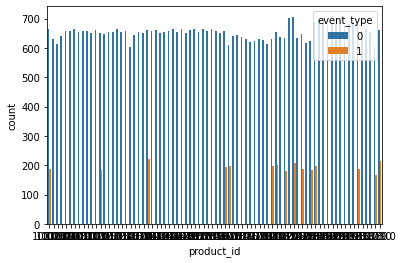

In [55]:
g4 = sns.countplot(x='product_id',hue='event_type',data=data)

In [44]:
d1 = data[data.event_type == 1].groupby(['offered_discount']).count()['event_type']
d1

offered_discount
0     1790
5      311
10     298
15     332
20     322
Name: event_type, dtype: int64

In [45]:
d2 = data.groupby(['offered_discount']).count()['event_type']
d2

offered_discount
0     33803
5      5495
10     5906
15     5880
20     5640
Name: event_type, dtype: int64

In [46]:
d3 = d1/d2
d3

offered_discount
0     0.052954
5     0.056597
10    0.050457
15    0.056463
20    0.057092
Name: event_type, dtype: float64

<AxesSubplot:title={'center':'buy to all'}, xlabel='offered_discount'>

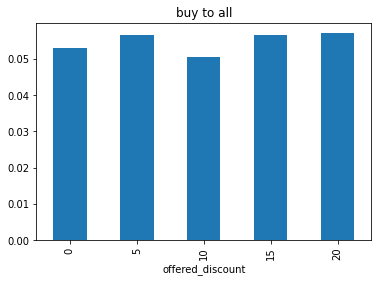

In [50]:
d3.plot(kind='bar',title='buy to all')

In [53]:
d4 = data[data.event_type == 1].groupby(['product_id'])
d4

In [68]:
d5 = data[data.user_id == 301]



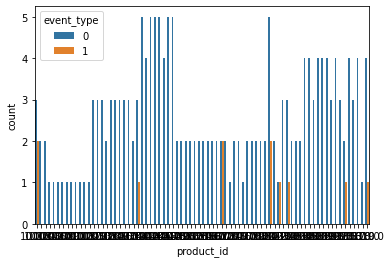

In [73]:
g5 = sns.countplot(x="product_id",hue="event_type",data=d5)


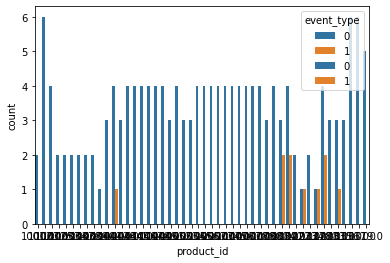

In [80]:
g6 = [sns.countplot(x="product_id",hue="event_type",data=data[data.user_id == x]) for x in range(299,301)]